In [1]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import f1_score, accuracy_score
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [7]:
#import datasets
Neighbor_train = pd.read_csv('Neighbor_feautures_train.csv')
Neighbor_test = pd.read_csv('Neighbor_feautures_test.csv')
Node_train = pd.read_csv('node_features_train.csv')
Node_test = pd.read_csv('node_features_test.csv')
Random_walk_train = pd.read_csv('Random_walk_feautures_train.csv')
Random_walk_test = pd.read_csv('Random_walk_feautures_test.csv')
Social_theory_train = pd.read_csv('social_theory_train.csv')
Social_theory_test = pd.read_csv('social_theory_test.csv')

In [8]:
Node_train.drop("y", axis=1, inplace=True)
Random_walk_train.drop("y", axis=1, inplace=True)
Social_theory_train.drop("y", axis=1, inplace=True)

Node_test.drop("y", axis=1, inplace=True)
Random_walk_test.drop("y", axis=1, inplace=True)
Social_theory_test.drop("y", axis=1, inplace=True)

train_df = pd.concat([Neighbor_train, Node_train, Random_walk_train, Social_theory_train], axis=1)
test_df = pd.concat([Neighbor_test, Node_test, Random_walk_test, Social_theory_test], axis=1)

In [9]:
y_train = train_df["y"]
x_train = train_df.drop("y", axis=1)
y_test = test_df["y"]
x_test = test_df.drop("y", axis=1)

<AxesSubplot:>

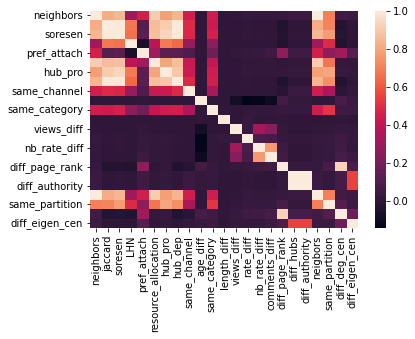

In [10]:
sns.heatmap(x_train.corr())

In [11]:
results = []

#I save the results for each features
for i in x_train.columns:
    res = []
    res.append(i)
    logr = LogisticRegression()
    #fit the model using just one metric
    logr.fit(x_train[i].values.reshape(-1, 1),y_train)
    #save the coefficient
    res.append(float(logr.coef_[0]))
    #save the accuracy
    res.append(accuracy_score(y_test, logr.predict(x_test[i].values.reshape(-1, 1))))
    #save the F1 score
    res.append(f1_score(y_test, logr.predict(x_test[i].values.reshape(-1, 1))))
    results.append(res)

In [12]:
metrics_scores = pd.DataFrame(results, columns = ["Metric", "Coefficient", "Accuracy","F1-score"])

In [13]:
# how much it
metrics_scores

,Metric,Coefficient,Accuracy,F1-score
0,neighbors,7.912202e+00,0.961460,0.959935
1,jaccard,8.686983e+01,0.955602,0.953559
2,soresen,6.386094e+01,0.958180,0.956374
3,LHN,1.639053e+02,0.917701,0.910350
4,pref_attach,7.841783e-03,0.697802,0.698292
5,resource_allocation,8.456633e+01,0.957646,0.955791
6,hub_pro,4.804322e+01,0.960991,0.959428
7,hub_dep,7.471378e+01,0.956364,0.954393
8,same_channel,8.173702e+00,0.598046,0.327927
9,age_diff,1.003052e-05,0.481951,0.472332


# Fit models

In [14]:
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('decision_tree', RandomForestClassifier()),
    ], 
    verbose = True)

In [15]:
pipeline.fit(x_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=  50.8s


Pipeline(steps=[('scaler', StandardScaler()),
                ('decision_tree', RandomForestClassifier())],
         verbose=True)

Text(0.5, 0, 'Random Forest Feature Importance')

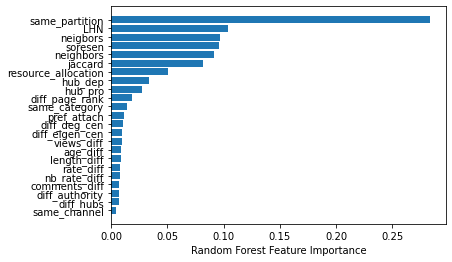

In [16]:
sorted_idx = pipeline["decision_tree"].feature_importances_.argsort()
plt.barh(x_train.columns[sorted_idx], pipeline["decision_tree"].feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [17]:
print(f1_score(y_test, pipeline.predict(x_test)))

0.9777598347127066


In [18]:
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('catboost', CatBoostClassifier())
    ], 
    verbose = True)

In [19]:
pipeline.fit(x_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
Learning rate set to 0.11888
0:	learn: 0.4443274	total: 93.4ms	remaining: 1m 33s
1:	learn: 0.3119361	total: 110ms	remaining: 54.8s
2:	learn: 0.2360289	total: 128ms	remaining: 42.4s
3:	learn: 0.1909078	total: 145ms	remaining: 36.1s
4:	learn: 0.1619968	total: 162ms	remaining: 32.3s
5:	learn: 0.1435016	total: 179ms	remaining: 29.7s
6:	learn: 0.1304647	total: 203ms	remaining: 28.8s
7:	learn: 0.1217305	total: 223ms	remaining: 27.6s
8:	learn: 0.1148095	total: 239ms	remaining: 26.3s
9:	learn: 0.1100930	total: 257ms	remaining: 25.4s
10:	learn: 0.1068003	total: 274ms	remaining: 24.6s
11:	learn: 0.1045355	total: 291ms	remaining: 24s
12:	learn: 0.1023956	total: 307ms	remaining: 23.3s
13:	learn: 0.1009837	total: 325ms	remaining: 22.9s
14:	learn: 0.0996348	total: 340ms	remaining: 22.3s
15:	learn: 0.0988932	total: 355ms	remaining: 21.8s
16:	learn: 0.0978930	total: 372ms	remaining: 21.5s
17:	learn: 0.0970836	total: 389ms	remaining

159:	learn: 0.0857120	total: 3.03s	remaining: 15.9s
160:	learn: 0.0856760	total: 3.04s	remaining: 15.9s
161:	learn: 0.0856597	total: 3.06s	remaining: 15.8s
162:	learn: 0.0856199	total: 3.08s	remaining: 15.8s
163:	learn: 0.0855868	total: 3.09s	remaining: 15.8s
164:	learn: 0.0855720	total: 3.11s	remaining: 15.7s
165:	learn: 0.0855414	total: 3.13s	remaining: 15.7s
166:	learn: 0.0854821	total: 3.14s	remaining: 15.7s
167:	learn: 0.0854504	total: 3.16s	remaining: 15.7s
168:	learn: 0.0854011	total: 3.19s	remaining: 15.7s
169:	learn: 0.0853825	total: 3.2s	remaining: 15.6s
170:	learn: 0.0853540	total: 3.22s	remaining: 15.6s
171:	learn: 0.0853221	total: 3.24s	remaining: 15.6s
172:	learn: 0.0852907	total: 3.26s	remaining: 15.6s
173:	learn: 0.0852513	total: 3.28s	remaining: 15.6s
174:	learn: 0.0852293	total: 3.29s	remaining: 15.5s
175:	learn: 0.0851968	total: 3.31s	remaining: 15.5s
176:	learn: 0.0851691	total: 3.33s	remaining: 15.5s
177:	learn: 0.0851360	total: 3.34s	remaining: 15.4s
178:	learn: 0

324:	learn: 0.0813775	total: 6.11s	remaining: 12.7s
325:	learn: 0.0813653	total: 6.13s	remaining: 12.7s
326:	learn: 0.0813485	total: 6.14s	remaining: 12.6s
327:	learn: 0.0813252	total: 6.16s	remaining: 12.6s
328:	learn: 0.0813134	total: 6.18s	remaining: 12.6s
329:	learn: 0.0812820	total: 6.2s	remaining: 12.6s
330:	learn: 0.0812516	total: 6.21s	remaining: 12.6s
331:	learn: 0.0812189	total: 6.23s	remaining: 12.5s
332:	learn: 0.0811896	total: 6.24s	remaining: 12.5s
333:	learn: 0.0811649	total: 6.26s	remaining: 12.5s
334:	learn: 0.0811541	total: 6.28s	remaining: 12.5s
335:	learn: 0.0811220	total: 6.29s	remaining: 12.4s
336:	learn: 0.0810973	total: 6.31s	remaining: 12.4s
337:	learn: 0.0810786	total: 6.33s	remaining: 12.4s
338:	learn: 0.0810593	total: 6.35s	remaining: 12.4s
339:	learn: 0.0810476	total: 6.36s	remaining: 12.4s
340:	learn: 0.0810318	total: 6.38s	remaining: 12.3s
341:	learn: 0.0810109	total: 6.4s	remaining: 12.3s
342:	learn: 0.0809938	total: 6.42s	remaining: 12.3s
343:	learn: 0.

483:	learn: 0.0782672	total: 8.92s	remaining: 9.51s
484:	learn: 0.0782359	total: 8.94s	remaining: 9.49s
485:	learn: 0.0782219	total: 8.95s	remaining: 9.47s
486:	learn: 0.0782026	total: 8.97s	remaining: 9.45s
487:	learn: 0.0781981	total: 8.99s	remaining: 9.43s
488:	learn: 0.0781874	total: 9s	remaining: 9.41s
489:	learn: 0.0781685	total: 9.02s	remaining: 9.39s
490:	learn: 0.0781516	total: 9.04s	remaining: 9.37s
491:	learn: 0.0781282	total: 9.05s	remaining: 9.35s
492:	learn: 0.0781206	total: 9.07s	remaining: 9.33s
493:	learn: 0.0781065	total: 9.09s	remaining: 9.31s
494:	learn: 0.0780712	total: 9.11s	remaining: 9.3s
495:	learn: 0.0780500	total: 9.13s	remaining: 9.28s
496:	learn: 0.0780398	total: 9.15s	remaining: 9.26s
497:	learn: 0.0780147	total: 9.17s	remaining: 9.24s
498:	learn: 0.0779969	total: 9.18s	remaining: 9.22s
499:	learn: 0.0779805	total: 9.2s	remaining: 9.2s
500:	learn: 0.0779580	total: 9.22s	remaining: 9.18s
501:	learn: 0.0779521	total: 9.23s	remaining: 9.16s
502:	learn: 0.0779

646:	learn: 0.0756260	total: 11.8s	remaining: 6.45s
647:	learn: 0.0756196	total: 11.8s	remaining: 6.44s
648:	learn: 0.0756072	total: 11.9s	remaining: 6.42s
649:	learn: 0.0755945	total: 11.9s	remaining: 6.4s
650:	learn: 0.0755733	total: 11.9s	remaining: 6.38s
651:	learn: 0.0755698	total: 11.9s	remaining: 6.37s
652:	learn: 0.0755544	total: 12s	remaining: 6.35s
653:	learn: 0.0755380	total: 12s	remaining: 6.33s
654:	learn: 0.0755204	total: 12s	remaining: 6.31s
655:	learn: 0.0754953	total: 12s	remaining: 6.3s
656:	learn: 0.0754675	total: 12s	remaining: 6.28s
657:	learn: 0.0754418	total: 12s	remaining: 6.26s
658:	learn: 0.0754272	total: 12.1s	remaining: 6.24s
659:	learn: 0.0754079	total: 12.1s	remaining: 6.22s
660:	learn: 0.0753953	total: 12.1s	remaining: 6.21s
661:	learn: 0.0753745	total: 12.1s	remaining: 6.19s
662:	learn: 0.0753658	total: 12.1s	remaining: 6.17s
663:	learn: 0.0753544	total: 12.2s	remaining: 6.15s
664:	learn: 0.0753435	total: 12.2s	remaining: 6.13s
665:	learn: 0.0753292	tota

807:	learn: 0.0739845	total: 14.5s	remaining: 3.46s
808:	learn: 0.0739734	total: 14.6s	remaining: 3.44s
809:	learn: 0.0739477	total: 14.6s	remaining: 3.42s
810:	learn: 0.0739388	total: 14.6s	remaining: 3.4s
811:	learn: 0.0739273	total: 14.6s	remaining: 3.38s
812:	learn: 0.0739130	total: 14.6s	remaining: 3.37s
813:	learn: 0.0738963	total: 14.7s	remaining: 3.35s
814:	learn: 0.0738752	total: 14.7s	remaining: 3.33s
815:	learn: 0.0738595	total: 14.7s	remaining: 3.31s
816:	learn: 0.0738451	total: 14.7s	remaining: 3.29s
817:	learn: 0.0738324	total: 14.7s	remaining: 3.27s
818:	learn: 0.0738135	total: 14.7s	remaining: 3.26s
819:	learn: 0.0738087	total: 14.8s	remaining: 3.24s
820:	learn: 0.0737915	total: 14.8s	remaining: 3.22s
821:	learn: 0.0737727	total: 14.8s	remaining: 3.2s
822:	learn: 0.0737589	total: 14.8s	remaining: 3.18s
823:	learn: 0.0737488	total: 14.8s	remaining: 3.17s
824:	learn: 0.0737410	total: 14.8s	remaining: 3.15s
825:	learn: 0.0737270	total: 14.9s	remaining: 3.13s
826:	learn: 0.

970:	learn: 0.0717388	total: 17.5s	remaining: 523ms
971:	learn: 0.0717297	total: 17.5s	remaining: 505ms
972:	learn: 0.0717270	total: 17.6s	remaining: 487ms
973:	learn: 0.0717112	total: 17.6s	remaining: 469ms
974:	learn: 0.0717030	total: 17.6s	remaining: 451ms
975:	learn: 0.0716943	total: 17.6s	remaining: 433ms
976:	learn: 0.0716862	total: 17.6s	remaining: 415ms
977:	learn: 0.0716645	total: 17.7s	remaining: 397ms
978:	learn: 0.0716571	total: 17.7s	remaining: 379ms
979:	learn: 0.0716400	total: 17.7s	remaining: 361ms
980:	learn: 0.0716144	total: 17.7s	remaining: 343ms
981:	learn: 0.0715984	total: 17.7s	remaining: 325ms
982:	learn: 0.0715835	total: 17.7s	remaining: 307ms
983:	learn: 0.0715792	total: 17.8s	remaining: 289ms
984:	learn: 0.0715643	total: 17.8s	remaining: 271ms
985:	learn: 0.0715554	total: 17.8s	remaining: 253ms
986:	learn: 0.0715452	total: 17.8s	remaining: 235ms
987:	learn: 0.0715256	total: 17.8s	remaining: 217ms
988:	learn: 0.0715107	total: 17.9s	remaining: 199ms
989:	learn: 

Pipeline(steps=[('scaler', StandardScaler()),
                ('catboost',
                 <catboost.core.CatBoostClassifier object at 0x7f804c3cfc70>)],
         verbose=True)

Text(0.5, 0, 'Catboost Feature Importance')

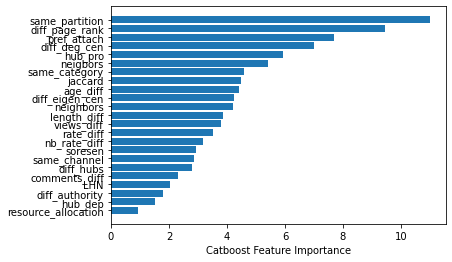

In [20]:
sorted_idx = pipeline["catboost"].feature_importances_.argsort()
plt.barh(x_train.columns[sorted_idx], pipeline["catboost"].feature_importances_[sorted_idx])
plt.xlabel("Catboost Feature Importance")

In [21]:
print(f1_score(y_test, pipeline.predict(x_test)))

0.9779152100755548


In [22]:
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('xgb', xgb.XGBClassifier())
    ], 
    verbose = True)

In [23]:
pipeline.fit(x_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:16:52] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[Pipeline] ............... (step 2 of 2) Processing xgb, total=  13.9s


Pipeline(steps=[('scaler', StandardScaler()),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))],
         verbose=True)

Text(0.5, 0, 'XGBoost Feature Importance')

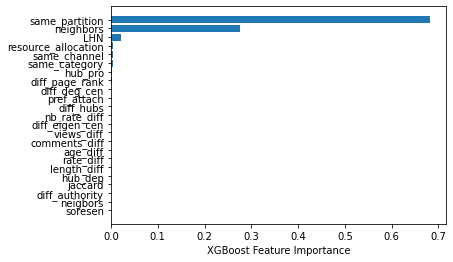

In [24]:
sorted_idx = pipeline["xgb"].feature_importances_.argsort()
plt.barh(x_train.columns[sorted_idx], pipeline["xgb"].feature_importances_[sorted_idx])
plt.xlabel("XGBoost Feature Importance")

In [25]:
print(f1_score(y_test, pipeline.predict(x_test)))

0.9776068010733538


In [26]:
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('ada', AdaBoostClassifier())
    ], 
    verbose = True)

In [27]:
pipeline.fit(x_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............... (step 2 of 2) Processing ada, total=  15.8s


Pipeline(steps=[('scaler', StandardScaler()), ('ada', AdaBoostClassifier())],
         verbose=True)

Text(0.5, 0, 'ADA Boosting Feature Importance')

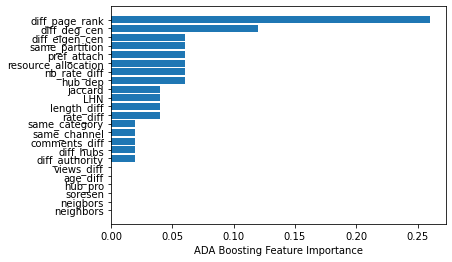

In [28]:
sorted_idx = pipeline["ada"].feature_importances_.argsort()
plt.barh(x_train.columns[sorted_idx], pipeline["ada"].feature_importances_[sorted_idx])
plt.xlabel("ADA Boosting Feature Importance")

In [29]:
print(f1_score(y_test, pipeline.predict(x_test)))

0.9768884347113134
